In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from src.env.DunderBotEnv import DunderBotEnv
import src.run as run
import src.load as load

loading config from config/config.yml
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from src.util.config import get_config
config = get_config()

# TODO:

- Constant reminder: Add more checks and tests
- Add env checker
- lock down the seeds (and decide in config from a few specific ones)
- understand the rendering during learning
- self.stationarize_rewards?
- Change policy network (need to understand terminology surronding it, e.g. envoronment, n_steps etc). See also discussion here (and elsewhere among Issues: https://github.com/hill-a/stable-baselines/issues/759)
- Check/Enable/Add exploration noise (for PPO2, use the entropy flag), use https://stable-baselines.readthedocs.io/en/master/common/schedules.html
- setup performance output, what we need to make data driven decision
    *e.g. https://colab.research.google.com/github/araffin/rl-tutorial-jnrr19/blob/master/1_getting_started.ipynb#scrollTo=63M8mSKR-6Zt
- Add benchmarks
- Find as long time series of BTCUSD hourly data as possible, quite shortright now
- Add finer temporal resolution in data (generate/download multiple granularity)
- untangle index weirdness (basically, try to enable prediction the last timestep, and make running interface easier (and more robust))
    * Check info box for reason and solution: https://stable-baselines.readthedocs.io/en/master/guide/vec_envs.html
    * This might also help (at the end) https://github.com/hill-a/stable-baselines/issues/779
    * LOW PRIO, since we might change the padding structure if we apply LSTM policy network
- Parallelize as much as possible
- Hyperparameter search
- Check float number type



# DONE: 
- add config
- modularize rewards
- own actions
- add more detailed actions for buy and sell amounts (still Discrete, I believe)
- wrap running code in function in main.py (to enable more dynamic data loading and train/test)
- own observations
- remove the bias when getting the observations (suggestion in the repo issues)
- download more interesting data and manually preprocess
- load interesting data, specified in config
- understand the time steps in learn and predict
- setup basic monitoring of training using TensorBoard
- Visualize basic performance
- Add support for fractions of shares
- Understand what should belong in what timestep (also decide on which price to plot as a result)
- add distributions of actions as output during prediction
- Refactor `_take_action` (might be something off in some calculations, also update terminology)
- Add commission and slippage
- Refactor current reward and add some new ones
- Add smallest amount of bitcoin we can own, as well as trading precision
- Add portfolio features
- Add reward output
- setup train/test functionality
- Enable saving/loading trained models
- Normalize observations


# Run

In [5]:
%%time
df = load.load_OHLC_data()
env = run.preprocess(df=df)
model = run.train(env=env, timesteps=int(8e4))





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Resetting to timesteps: start 9, end 21628.
--------------------------------------
| approxkl           | 0.00016874314 |
| clipfrac           | 0.0           |
| explained_variance | -0.0131       |
| fps                | 97            |
| n_updates          | 1             |
| policy_entropy     | 2.1970863     |
| policy_loss        | -0.0064947596 |
| serial_timesteps   | 128           |
| time_elapsed       | 0.000212      |
| total_timesteps    | 128           |
| value_loss         | 0.868934      |
--------------------------------------
-------------------------------------
| approxkl           | 6.428397e-05 |
| clipfrac           | 0.0          |
| explained_variance | 0.149        |
| fps                | 116          |
| n_updates         

--------------------------------------
| approxkl           | 4.1789895e-05 |
| clipfrac           | 0.0           |
| explained_variance | 0.228         |
| fps                | 125           |
| n_updates          | 16            |
| policy_entropy     | 2.1888804     |
| policy_loss        | -0.0023066173 |
| serial_timesteps   | 2048          |
| time_elapsed       | 16.9          |
| total_timesteps    | 2048          |
| value_loss         | 0.01559231    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00032297068 |
| clipfrac           | 0.0           |
| explained_variance | 0.0451        |
| fps                | 123           |
| n_updates          | 18            |
| policy_entropy     | 2.1796234     |
| policy_loss        | -0.0047878986 |
| serial_timesteps   | 2304          |
| time_elapsed       | 19            |
| total_timesteps    | 2304          |
| value_loss         | 0.0105993     |
-------------------------

--------------------------------------
| approxkl           | 0.00015070172 |
| clipfrac           | 0.0           |
| explained_variance | 0.164         |
| fps                | 116           |
| n_updates          | 50            |
| policy_entropy     | 2.1818213     |
| policy_loss        | -0.003826453  |
| serial_timesteps   | 6400          |
| time_elapsed       | 54.5          |
| total_timesteps    | 6400          |
| value_loss         | 0.023722706   |
--------------------------------------
--------------------------------------
| approxkl           | 0.00020429009 |
| clipfrac           | 0.0           |
| explained_variance | 0.0984        |
| fps                | 113           |
| n_updates          | 52            |
| policy_entropy     | 2.1884623     |
| policy_loss        | -0.004249434  |
| serial_timesteps   | 6656          |
| time_elapsed       | 56.8          |
| total_timesteps    | 6656          |
| value_loss         | 0.04139501    |
-------------------------

--------------------------------------
| approxkl           | 0.00034255077 |
| clipfrac           | 0.0           |
| explained_variance | 0.0353        |
| fps                | 100           |
| n_updates          | 84            |
| policy_entropy     | 2.1785116     |
| policy_loss        | -0.006397527  |
| serial_timesteps   | 10752         |
| time_elapsed       | 98.2          |
| total_timesteps    | 10752         |
| value_loss         | 0.018393552   |
--------------------------------------
--------------------------------------
| approxkl           | 9.115676e-05  |
| clipfrac           | 0.0           |
| explained_variance | -0.123        |
| fps                | 96            |
| n_updates          | 86            |
| policy_entropy     | 2.1751745     |
| policy_loss        | -0.0021922532 |
| serial_timesteps   | 11008         |
| time_elapsed       | 101           |
| total_timesteps    | 11008         |
| value_loss         | 0.004752746   |
-------------------------

--------------------------------------
| approxkl           | 0.00076034747 |
| clipfrac           | 0.0           |
| explained_variance | -0.0835       |
| fps                | 90            |
| n_updates          | 118           |
| policy_entropy     | 2.006327      |
| policy_loss        | -0.0031703115 |
| serial_timesteps   | 15104         |
| time_elapsed       | 146           |
| total_timesteps    | 15104         |
| value_loss         | 0.0017512233  |
--------------------------------------
--------------------------------------
| approxkl           | 0.00033803578 |
| clipfrac           | 0.0           |
| explained_variance | 0.013         |
| fps                | 77            |
| n_updates          | 120           |
| policy_entropy     | 1.9712509     |
| policy_loss        | -0.0014517345 |
| serial_timesteps   | 15360         |
| time_elapsed       | 149           |
| total_timesteps    | 15360         |
| value_loss         | 0.2130488     |
-------------------------

-------------------------------------
| approxkl           | 0.0005810906 |
| clipfrac           | 0.0          |
| explained_variance | -0.0342      |
| fps                | 80           |
| n_updates          | 152          |
| policy_entropy     | 1.9450368    |
| policy_loss        | -0.005497112 |
| serial_timesteps   | 19456        |
| time_elapsed       | 200          |
| total_timesteps    | 19456        |
| value_loss         | 0.013689679  |
-------------------------------------
--------------------------------------
| approxkl           | 0.00045436353 |
| clipfrac           | 0.0           |
| explained_variance | -0.358        |
| fps                | 73            |
| n_updates          | 154           |
| policy_entropy     | 2.0716028     |
| policy_loss        | -0.0076792752 |
| serial_timesteps   | 19712         |
| time_elapsed       | 203           |
| total_timesteps    | 19712         |
| value_loss         | 0.026691828   |
--------------------------------------

--------------------------------------
| approxkl           | 0.0005685077  |
| clipfrac           | 0.0           |
| explained_variance | -0.18         |
| fps                | 64            |
| n_updates          | 186           |
| policy_entropy     | 1.8984513     |
| policy_loss        | -0.0033753444 |
| serial_timesteps   | 23808         |
| time_elapsed       | 262           |
| total_timesteps    | 23808         |
| value_loss         | 0.0035637566  |
--------------------------------------
---------------------------------------
| approxkl           | 0.00089466624  |
| clipfrac           | 0.0            |
| explained_variance | -0.0762        |
| fps                | 73             |
| n_updates          | 188            |
| policy_entropy     | 1.8612803      |
| policy_loss        | -0.00044368661 |
| serial_timesteps   | 24064          |
| time_elapsed       | 266            |
| total_timesteps    | 24064          |
| value_loss         | 0.015452871    |
-------------

--------------------------------------
| approxkl           | 0.00019229933 |
| clipfrac           | 0.0           |
| explained_variance | 0.723         |
| fps                | 61            |
| n_updates          | 220           |
| policy_entropy     | 2.0668902     |
| policy_loss        | -0.006012546  |
| serial_timesteps   | 28160         |
| time_elapsed       | 329           |
| total_timesteps    | 28160         |
| value_loss         | 0.06444998    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00093017274 |
| clipfrac           | 0.001953125   |
| explained_variance | 0.422         |
| fps                | 61            |
| n_updates          | 222           |
| policy_entropy     | 2.049261      |
| policy_loss        | -0.010490801  |
| serial_timesteps   | 28416         |
| time_elapsed       | 333           |
| total_timesteps    | 28416         |
| value_loss         | 0.018421503   |
-------------------------

--------------------------------------
| approxkl           | 0.00083643664 |
| clipfrac           | 0.0           |
| explained_variance | 0.355         |
| fps                | 58            |
| n_updates          | 254           |
| policy_entropy     | 2.110801      |
| policy_loss        | -0.004680328  |
| serial_timesteps   | 32512         |
| time_elapsed       | 400           |
| total_timesteps    | 32512         |
| value_loss         | 0.007888205   |
--------------------------------------
---------------------------------------
| approxkl           | 0.00040300383  |
| clipfrac           | 0.0            |
| explained_variance | -0.886         |
| fps                | 56             |
| n_updates          | 256            |
| policy_entropy     | 2.0719864      |
| policy_loss        | -0.00034397782 |
| serial_timesteps   | 32768          |
| time_elapsed       | 404            |
| total_timesteps    | 32768          |
| value_loss         | 0.0012561302   |
-------------

-------------------------------------
| approxkl           | 0.0012244208 |
| clipfrac           | 0.0          |
| explained_variance | -0.165       |
| fps                | 53           |
| n_updates          | 288          |
| policy_entropy     | 1.7923555    |
| policy_loss        | -0.006988275 |
| serial_timesteps   | 36864        |
| time_elapsed       | 477          |
| total_timesteps    | 36864        |
| value_loss         | 0.0011593071 |
-------------------------------------
--------------------------------------
| approxkl           | 0.00062984764 |
| clipfrac           | 0.0           |
| explained_variance | -2.21         |
| fps                | 52            |
| n_updates          | 290           |
| policy_entropy     | 1.9266695     |
| policy_loss        | -0.0053345785 |
| serial_timesteps   | 37120         |
| time_elapsed       | 481           |
| total_timesteps    | 37120         |
| value_loss         | 0.010184938   |
--------------------------------------

--------------------------------------
| approxkl           | 0.0006060392  |
| clipfrac           | 0.0           |
| explained_variance | 0.473         |
| fps                | 46            |
| n_updates          | 322           |
| policy_entropy     | 1.7108885     |
| policy_loss        | -0.0008395454 |
| serial_timesteps   | 41216         |
| time_elapsed       | 562           |
| total_timesteps    | 41216         |
| value_loss         | 0.07918562    |
--------------------------------------
--------------------------------------
| approxkl           | 0.0004085141  |
| clipfrac           | 0.0           |
| explained_variance | 0.307         |
| fps                | 50            |
| n_updates          | 324           |
| policy_entropy     | 1.9221036     |
| policy_loss        | -0.0024113718 |
| serial_timesteps   | 41472         |
| time_elapsed       | 567           |
| total_timesteps    | 41472         |
| value_loss         | 0.011946422   |
-------------------------

-------------------------------------
| approxkl           | 0.0015117424 |
| clipfrac           | 0.0          |
| explained_variance | 0.175        |
| fps                | 47           |
| n_updates          | 356          |
| policy_entropy     | 1.6681684    |
| policy_loss        | -0.006978541 |
| serial_timesteps   | 45568        |
| time_elapsed       | 652          |
| total_timesteps    | 45568        |
| value_loss         | 0.011857326  |
-------------------------------------
--------------------------------------
| approxkl           | 0.0006316168  |
| clipfrac           | 0.0           |
| explained_variance | -0.124        |
| fps                | 47            |
| n_updates          | 358           |
| policy_entropy     | 1.8538321     |
| policy_loss        | -0.0066552097 |
| serial_timesteps   | 45824         |
| time_elapsed       | 658           |
| total_timesteps    | 45824         |
| value_loss         | 0.0224166     |
--------------------------------------

--------------------------------------
| approxkl           | 0.00024679233 |
| clipfrac           | 0.0           |
| explained_variance | 0.383         |
| fps                | 42            |
| n_updates          | 390           |
| policy_entropy     | 2.0845237     |
| policy_loss        | -0.0043753097 |
| serial_timesteps   | 49920         |
| time_elapsed       | 753           |
| total_timesteps    | 49920         |
| value_loss         | 0.03600903    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00017269455 |
| clipfrac           | 0.0           |
| explained_variance | 0.723         |
| fps                | 41            |
| n_updates          | 392           |
| policy_entropy     | 1.9859533     |
| policy_loss        | -0.003617596  |
| serial_timesteps   | 50176         |
| time_elapsed       | 759           |
| total_timesteps    | 50176         |
| value_loss         | 0.021921284   |
-------------------------

-------------------------------------
| approxkl           | 0.000521675  |
| clipfrac           | 0.0          |
| explained_variance | 0.355        |
| fps                | 39           |
| n_updates          | 424          |
| policy_entropy     | 1.7447363    |
| policy_loss        | -0.00445312  |
| serial_timesteps   | 54272        |
| time_elapsed       | 858          |
| total_timesteps    | 54272        |
| value_loss         | 0.0047776136 |
-------------------------------------
-------------------------------------
| approxkl           | 0.002096962  |
| clipfrac           | 0.001953125  |
| explained_variance | 0.544        |
| fps                | 38           |
| n_updates          | 426          |
| policy_entropy     | 1.7393895    |
| policy_loss        | -0.005465013 |
| serial_timesteps   | 54528        |
| time_elapsed       | 865          |
| total_timesteps    | 54528        |
| value_loss         | 0.010435968  |
-------------------------------------
------------

--------------------------------------
| approxkl           | 0.00013237123 |
| clipfrac           | 0.0           |
| explained_variance | 0.091         |
| fps                | 36            |
| n_updates          | 458           |
| policy_entropy     | 1.1450189     |
| policy_loss        | -0.0013069155 |
| serial_timesteps   | 58624         |
| time_elapsed       | 977           |
| total_timesteps    | 58624         |
| value_loss         | 0.080397874   |
--------------------------------------
--------------------------------------
| approxkl           | 0.00032182093 |
| clipfrac           | 0.0           |
| explained_variance | 0.349         |
| fps                | 37            |
| n_updates          | 460           |
| policy_entropy     | 1.2937602     |
| policy_loss        | -0.0061822757 |
| serial_timesteps   | 58880         |
| time_elapsed       | 984           |
| total_timesteps    | 58880         |
| value_loss         | 0.004293343   |
-------------------------

--------------------------------------
| approxkl           | 0.00090040354 |
| clipfrac           | 0.0           |
| explained_variance | 0.168         |
| fps                | 35            |
| n_updates          | 492           |
| policy_entropy     | 1.3621722     |
| policy_loss        | -0.007815743  |
| serial_timesteps   | 62976         |
| time_elapsed       | 1.1e+03       |
| total_timesteps    | 62976         |
| value_loss         | 0.03419551    |
--------------------------------------
--------------------------------------
| approxkl           | 0.0008505145  |
| clipfrac           | 0.0           |
| explained_variance | 0.324         |
| fps                | 36            |
| n_updates          | 494           |
| policy_entropy     | 1.2359833     |
| policy_loss        | -0.0055401945 |
| serial_timesteps   | 63232         |
| time_elapsed       | 1.11e+03      |
| total_timesteps    | 63232         |
| value_loss         | 0.022846602   |
-------------------------

--------------------------------------
| approxkl           | 0.00040484432 |
| clipfrac           | 0.0           |
| explained_variance | -0.0651       |
| fps                | 33            |
| n_updates          | 526           |
| policy_entropy     | 1.0464652     |
| policy_loss        | -0.0075334553 |
| serial_timesteps   | 67328         |
| time_elapsed       | 1.23e+03      |
| total_timesteps    | 67328         |
| value_loss         | 0.11668858    |
--------------------------------------
--------------------------------------
| approxkl           | 0.00043984962 |
| clipfrac           | 0.0           |
| explained_variance | 0.267         |
| fps                | 33            |
| n_updates          | 528           |
| policy_entropy     | 1.5503521     |
| policy_loss        | -0.005074351  |
| serial_timesteps   | 67584         |
| time_elapsed       | 1.24e+03      |
| total_timesteps    | 67584         |
| value_loss         | 0.076325566   |
-------------------------

--------------------------------------
| approxkl           | 0.0024226506  |
| clipfrac           | 0.0078125     |
| explained_variance | 0.32          |
| fps                | 31            |
| n_updates          | 560           |
| policy_entropy     | 1.7595897     |
| policy_loss        | -0.0057722647 |
| serial_timesteps   | 71680         |
| time_elapsed       | 1.36e+03      |
| total_timesteps    | 71680         |
| value_loss         | 0.021336956   |
--------------------------------------
-------------------------------------
| approxkl           | 0.0024065985 |
| clipfrac           | 0.005859375  |
| explained_variance | 0.467        |
| fps                | 31           |
| n_updates          | 562          |
| policy_entropy     | 1.693967     |
| policy_loss        | -0.014349731 |
| serial_timesteps   | 71936        |
| time_elapsed       | 1.37e+03     |
| total_timesteps    | 71936        |
| value_loss         | 0.018989403  |
-------------------------------------

--------------------------------------
| approxkl           | 0.00078069075 |
| clipfrac           | 0.0           |
| explained_variance | 0.313         |
| fps                | 28            |
| n_updates          | 594           |
| policy_entropy     | 1.9475995     |
| policy_loss        | -0.002894084  |
| serial_timesteps   | 76032         |
| time_elapsed       | 1.5e+03       |
| total_timesteps    | 76032         |
| value_loss         | 0.0016910798  |
--------------------------------------
-------------------------------------
| approxkl           | 0.004579244  |
| clipfrac           | 0.064453125  |
| explained_variance | 0.0763       |
| fps                | 30           |
| n_updates          | 596          |
| policy_entropy     | 1.8772078    |
| policy_loss        | -0.011864309 |
| serial_timesteps   | 76288        |
| time_elapsed       | 1.51e+03     |
| total_timesteps    | 76288        |
| value_loss         | 0.002231108  |
-------------------------------------

Loading files from /tmp/
Loading a model without an environment, this model cannot be trained until it has a valid environment.
Model connected with env
Predicting for 10 timesteps
Resetting to timesteps: start 21638, end 26628.
Rendering TradingChartStatic for index steps 21638 through 21648
21638 21648


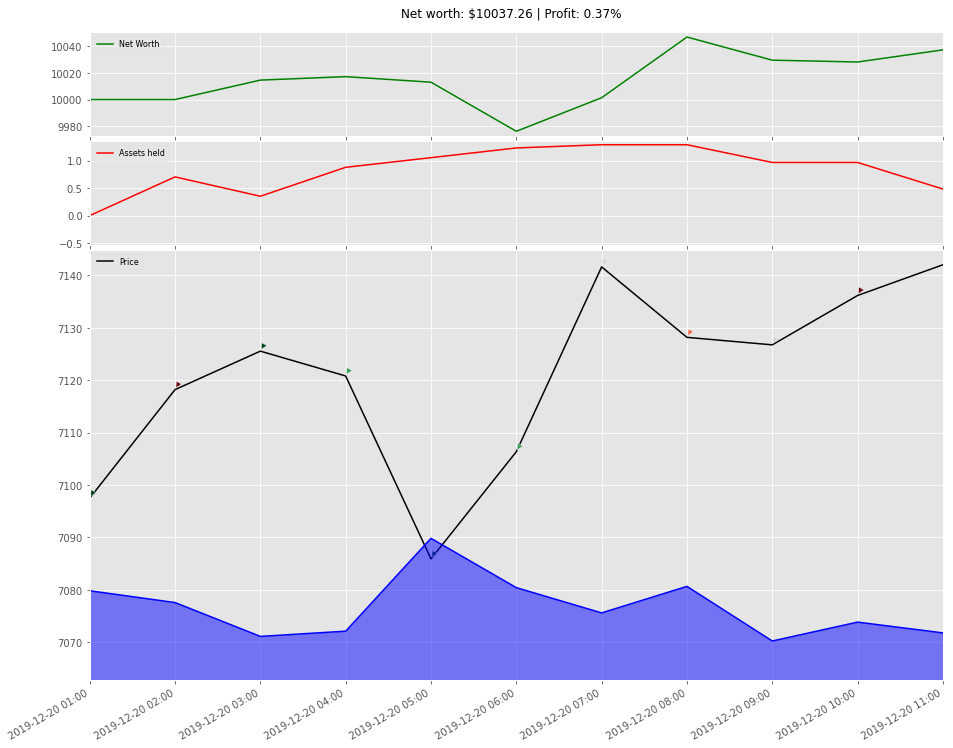

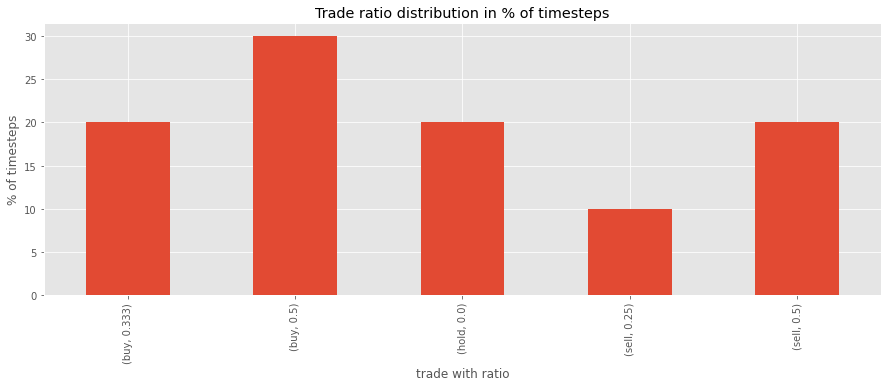

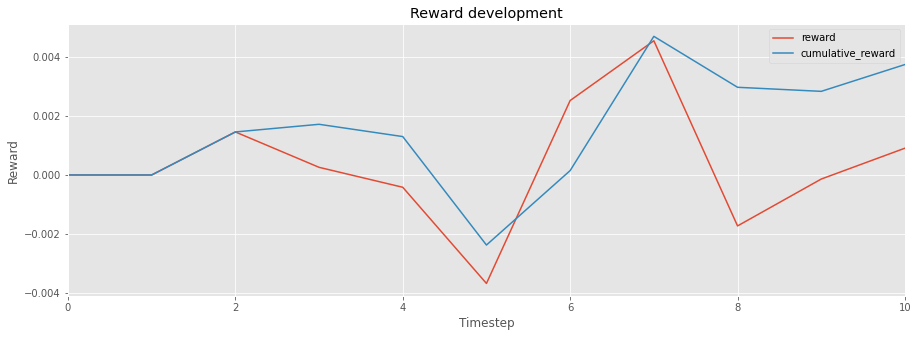

CPU times: user 3.57 s, sys: 401 ms, total: 3.98 s
Wall time: 3.64 s


In [48]:
%%time
timesteps = config.train_test.test_timesteps - config.data_n_timesteps - 1
timesteps=10
run.predict(df=df, timesteps=timesteps, rendermode='human')

In [6]:
import pickle
with open('all_dict_pred.pickle', 'rb') as f:
    x = pickle.load(f)
x

{'current_step': 18,
 'net_worths': [10000.0,
  10000.0,
  10000.0,
  10001.7,
  9993.31,
  9845.08,
  9818.83,
  9857.64,
  9811.18,
  9826.9,
  9849.13,
  9841.65,
  9846.6,
  9906.72,
  9857.82,
  9825.55,
  9844.28,
  9835.73,
  9843.79,
  9853.91,
  9847.28,
  9858.84,
  9884.08,
  9846.62,
  9846.11,
  9859.04,
  9865.74,
  9849.82,
  9871.96,
  9886.04,
  9852.41,
  9828.36,
  9781.67,
  9796.26,
  9789.61,
  9787.16,
  9798.66,
  9821.71,
  9819.04,
  9825.21,
  9813.02,
  9817.28,
  9809.9,
  9810.35,
  9815.73,
  9852.16,
  9844.47,
  9845.15,
  9833.28,
  9836.58,
  9863.32,
  9843.26,
  9846.9,
  9838.6,
  9843.73,
  9840.44,
  9971.54,
  9981.18,
  9980.54,
  9981.68,
  9980.22,
  9984.06,
  10005.04,
  9992.58,
  9998.53,
  10012.4,
  10006.93,
  9995.75,
  9951.78,
  9922.8,
  9824.37,
  9840.96,
  9803.94,
  9764.1,
  9780.03,
  9798.29,
  9787.19,
  9793.24,
  9805.33,
  9789.97,
  9796.14,
  9795.5,
  9814.97,
  9812.16,
  9803.83,
  9817.89,
  9804.12,
  9807.79,
  9

In [8]:
x.keys()

dict_keys(['current_step', 'net_worths', 'trades', 'account_history', 'rewards'])